In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [146]:
df = pd.read_csv('out_1.csv')
df = df.drop([0,1], axis=0)
df.head()

,Timestamp,accX_neck,accY_neck,accZ_neck,magX_neck,magY_neck,magZ_neck,gyroX_neck,gyroY_neck,gyroZ_neck,...,accX_shoulder_r,accY_shoulder_r,accZ_shoulder_r,magX_shoulder_r,magY_shoulder_r,magZ_shoulder_r,gyroX_shoulder_r,gyroY_shoulder_r,gyroZ_shoulder_r,Classification
2,1.635238e+09,-0.258301,-1.501953,1.218750,-0.938416,0.617981,2.601624,21.291331,-23.240537,-15.893529,...,-1.024902,-1.323242,1.143555,1.075745,-1.495361,1.884460,218.610989,7.796825,79.017827,0
3,1.635238e+09,-0.258301,-1.501953,1.218750,-0.938416,0.617981,2.601624,21.291331,-23.240537,-15.893529,...,-1.024902,-1.323242,1.143555,1.075745,-1.495361,1.884460,218.610989,7.796825,79.017827,0
4,1.635238e+09,-0.247070,-1.513672,1.195312,-1.899719,1.129150,2.853394,21.291331,-19.791941,-16.943101,...,-0.985840,-1.268555,1.194824,-2.784729,0.205994,1.495361,218.011233,7.347009,77.368498,0
5,1.635238e+09,-0.247070,-1.513672,1.195312,-1.899719,1.129150,2.853394,21.291331,-19.791941,-16.943101,...,-0.985840,-1.268555,1.194824,-2.784729,0.205994,1.495361,218.011233,7.347009,77.368498,0
6,1.635238e+09,-0.254883,-1.504395,1.204590,-0.579834,0.221252,2.052307,21.891087,-22.340904,-16.793162,...,-1.012207,-1.311523,1.131836,-2.479553,1.342773,1.663208,217.561416,7.047131,76.918681,0


In [147]:
df=df[['accX_neck', 'accY_neck', 'accZ_neck', 'accX_back', 'accY_back', 'accZ_back', 
       'accX_shoulder_l', 'accY_shoulder_l', 'accZ_shoulder_l', 
       'accX_shoulder_r', 'accY_shoulder_r', 'accZ_shoulder_r',
      'Classification']]

df['accMag_neck'] = df['accX_neck']*df['accX_neck'] + df['accY_neck']*df['accY_neck'] + df['accZ_neck']*df['accZ_neck']
df['accMag_neck'] = np.sqrt(df['accMag_neck'])
df = df.drop(df[df['accMag_neck']  < 0.1].index)
df['accX_neck'] /= df['accMag_neck']
df['accY_neck'] /= df['accMag_neck']
df['accZ_neck'] /= df['accMag_neck']
df['accMag_neck'] /= df['accMag_neck']

df['accMag_back'] = df['accX_back']*df['accX_back'] + df['accY_back']*df['accY_back'] + df['accZ_back']*df['accZ_back']
df['accMag_back'] = np.sqrt(df['accMag_back'])
df = df.drop(df[df['accMag_back']  < 0.1].index)
df['accX_back'] /= df['accMag_back']
df['accY_back'] /= df['accMag_back']
df['accZ_back'] /= df['accMag_back']
df['accMag_back'] /= df['accMag_back']

df['accMag_shoulder_l'] = df['accX_shoulder_l']*df['accX_shoulder_l'] + df['accY_shoulder_l']*df['accY_shoulder_l'] + df['accZ_shoulder_l']*df['accZ_shoulder_l']
df['accMag_shoulder_l'] = np.sqrt(df['accMag_shoulder_l'])
df = df.drop(df[df['accMag_shoulder_l']  < 0.1].index)
df['accX_shoulder_l'] /= df['accMag_shoulder_l']
df['accY_shoulder_l'] /= df['accMag_shoulder_l']
df['accZ_shoulder_l'] /= df['accMag_shoulder_l']
df['accMag_shoulder_l'] /= df['accMag_shoulder_l']

df['accMag_shoulder_r'] = df['accX_shoulder_r']*df['accX_shoulder_r'] + df['accY_shoulder_r']*df['accY_shoulder_r'] + df['accZ_shoulder_r']*df['accZ_shoulder_r']
df['accMag_shoulder_r'] = np.sqrt(df['accMag_shoulder_r'])
df = df.drop(df[df['accMag_shoulder_r']  < 0.1].index)
df['accX_shoulder_r'] /= df['accMag_shoulder_r']
df['accY_shoulder_r'] /= df['accMag_shoulder_r']
df['accZ_shoulder_r'] /= df['accMag_shoulder_r']
df['accMag_shoulder_r'] /= df['accMag_shoulder_r']

df.head()

,accX_neck,accY_neck,accZ_neck,accX_back,accY_back,accZ_back,accX_shoulder_l,accY_shoulder_l,accZ_shoulder_l,accX_shoulder_r,accY_shoulder_r,accZ_shoulder_r,Classification,accMag_neck,accMag_back,accMag_shoulder_l,accMag_shoulder_r
2,-0.132367,-0.769683,0.624554,-0.954846,0.032322,0.295336,0.650795,-0.667363,0.362067,-0.505602,-0.652778,0.564135,0,1.0,1.0,1.0,1.0
3,-0.132367,-0.769683,0.624554,-0.954846,0.032322,0.295336,0.650795,-0.667363,0.362067,-0.505602,-0.652778,0.564135,0,1.0,1.0,1.0,1.0
4,-0.127062,-0.778444,0.614720,-0.951677,0.031215,0.305510,0.653034,-0.668097,0.356642,-0.492384,-0.633587,0.596762,0,1.0,1.0,1.0,1.0
5,-0.127062,-0.778444,0.614720,-0.951677,0.031215,0.305510,0.653034,-0.668097,0.356642,-0.492384,-0.633587,0.596762,0,1.0,1.0,1.0,1.0
6,-0.131111,-0.773858,0.619639,-0.950440,0.033470,0.309102,0.663096,-0.684627,0.302639,-0.504485,-0.653664,0.564108,0,1.0,1.0,1.0,1.0


In [148]:
y = df['Classification']
X = df.drop(['Classification', 'accMag_neck', 'accMag_back', 'accMag_shoulder_l', 'accMag_shoulder_r'],axis=1)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

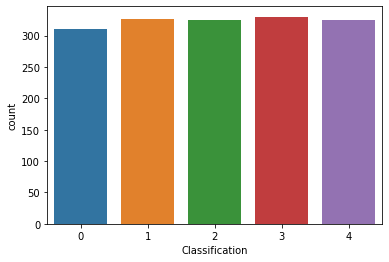

In [150]:
sns.countplot(y_train)
plt.xticks()

In [151]:
# load library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

# fit the predictor and target
history = rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)# check performance
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
# print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
# print('F1 score:',f1_score(y_test, rfc_predict, average='ovo'))
# print('Precision:',precision_score(y_test, rfc_predict))
# print('Recall:',recall_score(y_test, rfc_predict))

Accuracy score: 1.0


In [177]:
import joblib
# save the model to disk
filename = 'rfc_model.sav'
joblib.dump(rfc, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

1.0


In [176]:
sample = [-0.06437778, -0.9050758, 0.42034901, -0.95735092,  0.03532022,  0.28676069,
    0.66192558, -0.56875487,  0.48823398, -0.49501592, -0.52682804,  0.69094968]
model_input = np.array(sample).reshape(1, -1)
loaded_model.predict_proba(model_input)

array([[0., 0., 0., 0., 1.]])